# Movie reviews sentiment analysis

## Nearest neighbors using compression (gzip) based similarity

*Zhiying Jiang, Matthew Yang, Mikhail Tsirlin, Raphael Tang, Yiqin Dai, and Jimmy Lin. 2023. “Low-Resource” Text Classification: A Parameter-Free Classification Method with Compressors. In Findings of the Association for Computational Linguistics: ACL 2023, pages 6810–6828, Toronto, Canada. Association for Computational Linguistics.*

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import gzip
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score)

In [2]:
# nltk.download('movie_reviews')

In [3]:
reviews = [movie_reviews.raw(txt) for txt in movie_reviews.fileids()]

In [4]:
polarities = [int(movie_reviews.categories(id)[0] == "pos") for id in movie_reviews.fileids()]

In [5]:
db = pd.DataFrame({"txt": reviews, "y": polarities})

In [6]:
db.head()

,txt,y
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [7]:
trn, tst = train_test_split(db, test_size = 0.5, random_state = 42)

In [8]:
C2 = [len(gzip.compress(x2.encode())) for x2 in trn.txt]

In [9]:
dist = []
for x1 in tst.txt:
    c1 = len(gzip.compress(x1.encode()))
    distance_from_x1 = []
    for x2, c2 in zip(trn.txt, C2):
        c12 = len(gzip.compress((x1 + " " + x2).encode()))
        ncd = (c12 - min(c1, c2)) / max(c1, c2)
        distance_from_x1.append(ncd)
    dist.append(distance_from_x1)

In [10]:
k = 147

In [11]:
pr_ncd = [trn.y.iloc[np.argsort(d)[:k].tolist()].mean() for d in dist]

In [12]:
fpr, tpr, threshold = roc_curve(tst.y, pr_ncd)

In [13]:
theme_set(theme_bw());

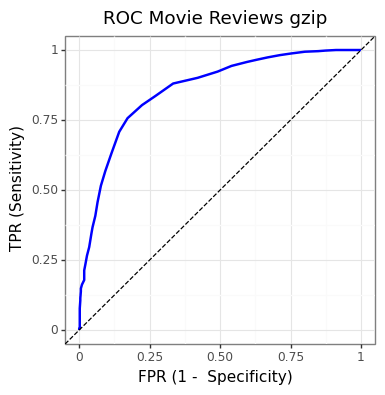

<ggplot: (116900594348)>

In [14]:
(ggplot() +
     geom_line(aes(x = fpr, y = tpr), color = "blue", size = 1) +
     geom_abline(linetype = "dashed") +
     labs(x = "FPR (1 -  Specificity)", y = "TPR (Sensitivity)", title = "ROC Movie Reviews gzip") +
     theme(figure_size = (4, 4)))

In [15]:
print(f"AUC = {roc_auc_score(tst.y, pr_ncd):.3f}")

AUC = 0.858
